## 1. EDA

In [1]:
import pandas as pd
import openpyxl
import warnings

warnings.filterwarnings('ignore')

athletes_df = pd.read_excel('data/tokyo olympics/Athletes.xlsx')
coaches_df = pd.read_excel('data/tokyo olympics/Coaches.xlsx')
medals_df = pd.read_excel('data/tokyo olympics/Medals.xlsx')

In [2]:
# 국가 메달 순위 데이터 정제
medals_df.sort_values(by='Rank by Total', ascending=True, inplace=True)
medals_df.drop('Rank', axis=1, inplace=True)
medals_df.set_index('Rank by Total', inplace=True)
medals_df

,Team/NOC,Gold,Silver,Bronze,Total
Rank by Total,,,,,
1,United States of America,39,41,33,113
2,People's Republic of China,38,32,18,88
3,ROC,20,28,23,71
4,Great Britain,22,21,22,65
5,Japan,27,14,17,58
...,...,...,...,...,...
77,Bahrain,0,1,0,1
77,Bermuda,1,0,0,1
77,Morocco,1,0,0,1


Text(0.5, 1.0, 'Top 30 Countries with Medals')

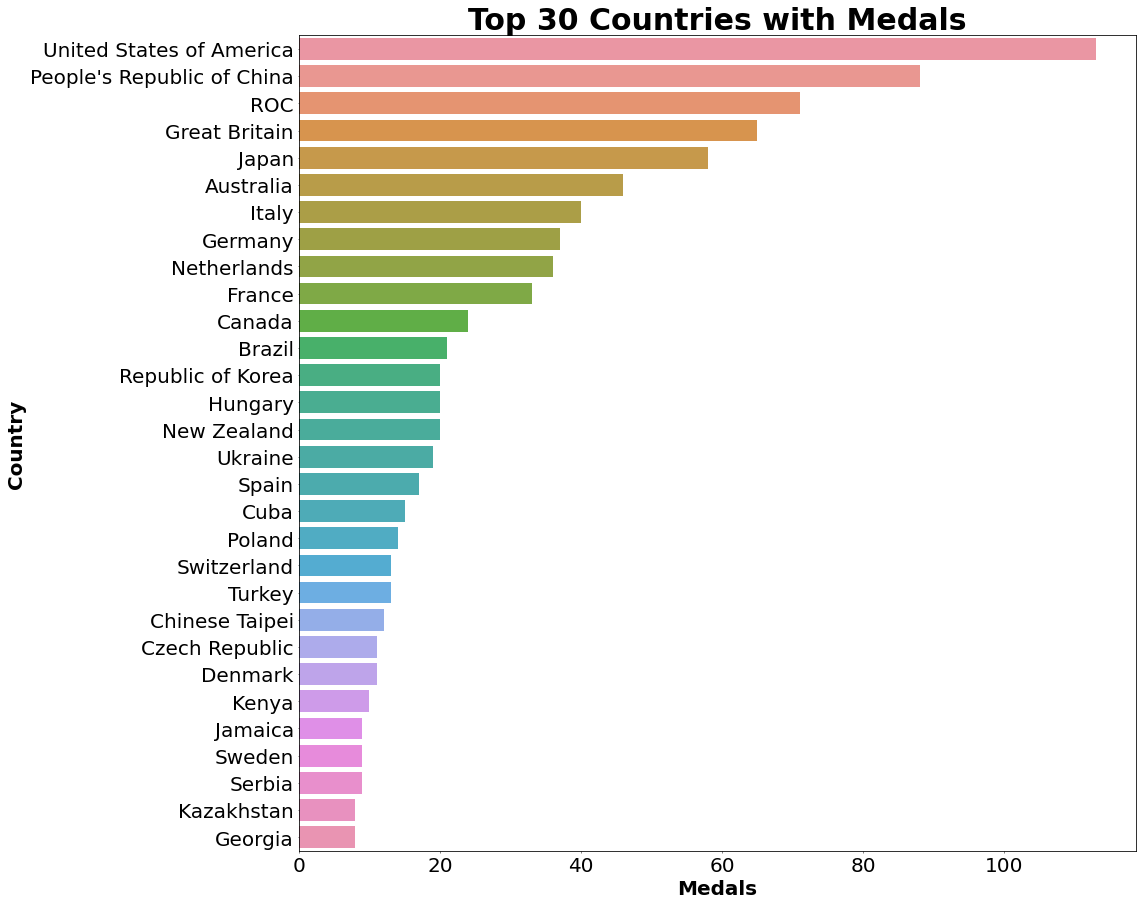

In [3]:
# 국가별 메달 순위 시각화
import matplotlib.pyplot as plt
import seaborn as sns

medals_df.reset_index(inplace=True)
medals_df.rename(columns={'Rank by Total' : 'Rank', 'Team/NOC' : 'Country'}, inplace=True)

plt.figure(figsize=(15, 15))
ax = sns.barplot(x='Total', y='Country', data=medals_df[:30])

ax.set_xlabel('Medals', fontsize=20, weight='bold')
ax.set_ylabel('Country', fontsize=20, weight='bold')
ax.tick_params(labelsize=20, width=0.5, length=1.5)
plt.title('Top 30 Countries with Medals', size=30, weight='bold')

In [4]:
medals_df

,Rank,Country,Gold,Silver,Bronze,Total
0,1,United States of America,39,41,33,113
1,2,People's Republic of China,38,32,18,88
2,3,ROC,20,28,23,71
3,4,Great Britain,22,21,22,65
4,5,Japan,27,14,17,58
...,...,...,...,...,...,...
88,77,Bahrain,0,1,0,1
89,77,Bermuda,1,0,0,1
90,77,Morocco,1,0,0,1
91,77,Turkmenistan,0,1,0,1


In [5]:
# 국가별 선수 및 코치 인원 수 파악
athletes_df.rename(columns={'NOC' : 'Country'}, inplace=True)
athletes_count = athletes_df.groupby('Country').size()
athletes_count_df = pd.DataFrame(athletes_count, columns=['athletes_population'])

athletes_count_df = athletes_count_df.reset_index()
athletes_count_df

,Country,athletes_population
0,Afghanistan,5
1,Albania,8
2,Algeria,41
3,American Samoa,5
4,Andorra,2
...,...,...
201,"Virgin Islands, British",3
202,"Virgin Islands, US",4
203,Yemen,3
204,Zambia,29


Text(0.5, 1.0, 'Top 30 Countries with athletes population')

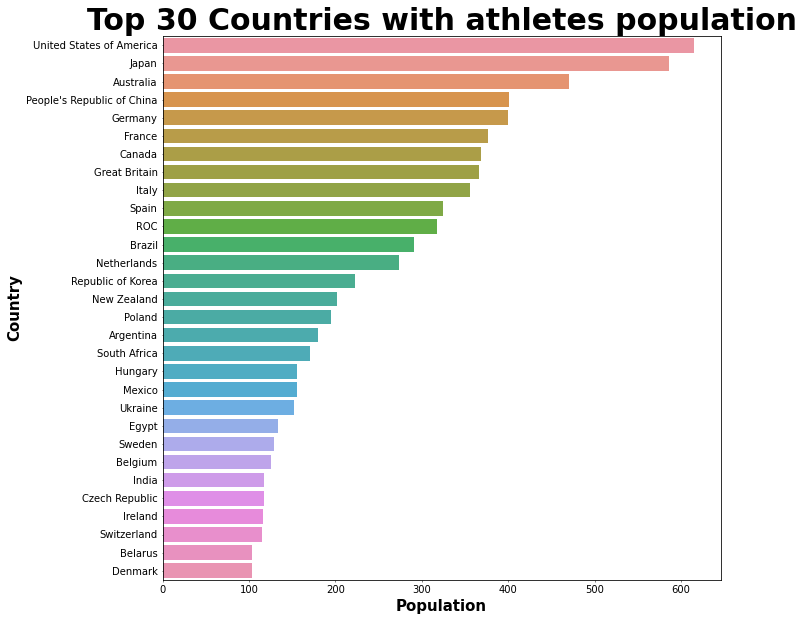

In [6]:
# 국가별 운동선수 수 시각화
athletes_count_df.sort_values(by='athletes_population', ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
ax = sns.barplot(x='athletes_population', y='Country', data=athletes_count_df[:30])

ax.set_xlabel('Population', fontsize=15, weight='bold')
ax.set_ylabel('Country', fontsize=15, weight='bold')
ax.tick_params(labelsize=10, width=0.5, length=1.5)
plt.title('Top 30 Countries with athletes population', size=30, weight='bold')

In [7]:
coaches_df.rename(columns={'NOC' : 'Country'}, inplace=True)
coaches_count = coaches_df.groupby('Country').size()
coaches_count_df = pd.DataFrame(coaches_count, columns=['coaches_population'])

coaches_count_df = coaches_count_df.reset_index()
coaches_count_df

,Country,coaches_population
0,Angola,1
1,Argentina,11
2,Australia,22
3,Austria,3
4,Bahrain,1
...,...,...
56,Turkey,1
57,Ukraine,4
58,United States of America,28
59,Venezuela,10


Text(0.5, 1.0, 'Top 30 Countries with coaches population')

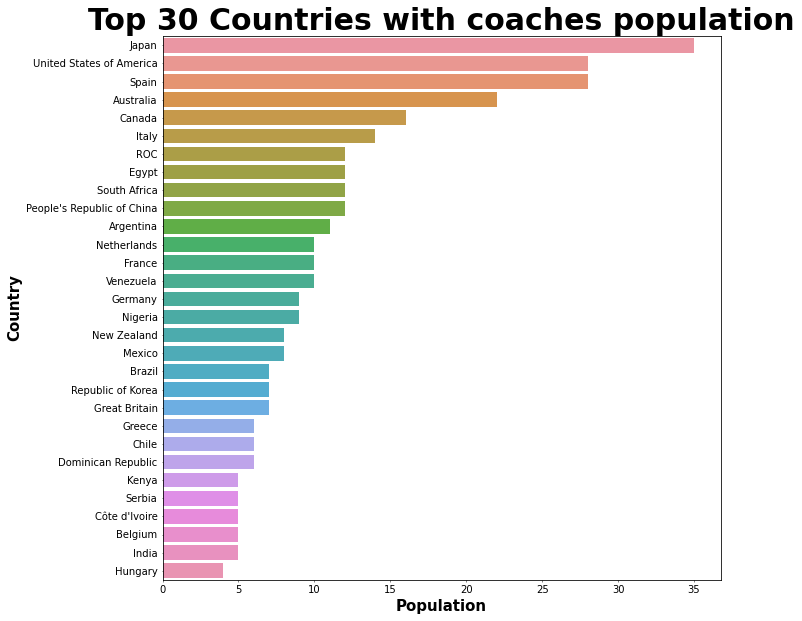

In [8]:
# 국가별 코치 수 시각화
coaches_count_df.sort_values(by='coaches_population', ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
ax = sns.barplot(x='coaches_population', y='Country', data=coaches_count_df[:30])

ax.set_xlabel('Population', fontsize=15, weight='bold')
ax.set_ylabel('Country', fontsize=15, weight='bold')
ax.tick_params(labelsize=10, width=0.5, length=1.5)
plt.title('Top 30 Countries with coaches population', size=30, weight='bold')

## 2. 국가별 선수 및 코치 수에 따른 국가별 메달 보유 수 선형 회귀 분석

In [9]:
# 메달 보유 수 데이터에 국가별 선수 및 코치 수 데이터 병합
# 1. 국가별 선수 및 코치 수 데이터 병합
count_df = pd.merge(athletes_count_df, coaches_count_df, on='Country', how='outer')
count_df.fillna(0, inplace=True)
count_df

,Country,athletes_population,coaches_population
0,United States of America,615,28.0
1,Japan,586,35.0
2,Australia,470,22.0
3,People's Republic of China,401,12.0
4,Germany,400,9.0
...,...,...,...
201,South Sudan,2,0.0
202,Central African Republic,2,0.0
203,Saint Kitts and Nevis,2,0.0
204,St Vincent and the Grenadines,2,0.0


In [10]:
# 2. 메달 보유 수 데이터에 최종 병합
total_df = pd.merge(medals_df, count_df, on='Country')
total_df.dtypes

total_df = total_df.astype({'coaches_population' : 'int'})
total_df.drop(['Gold', 'Silver', 'Bronze'], axis=1, inplace=True)
total_df

,Rank,Country,Total,athletes_population,coaches_population
0,1,United States of America,113,615,28
1,2,People's Republic of China,88,401,12
2,3,ROC,71,318,12
3,4,Great Britain,65,366,7
4,5,Japan,58,586,35
...,...,...,...,...,...
88,77,Bahrain,1,31,1
89,77,Bermuda,1,2,0
90,77,Morocco,1,48,0
91,77,Turkmenistan,1,8,0


In [11]:
# 상관분석 시행
total_df.corr(method='pearson')

,Rank,Total,athletes_population,coaches_population
Rank,1.000000,-0.692450,-0.744453,-0.540418
Total,-0.692450,1.000000,0.875115,0.691020
athletes_population,-0.744453,0.875115,1.000000,0.869439
coaches_population,-0.540418,0.691020,0.869439,1.000000


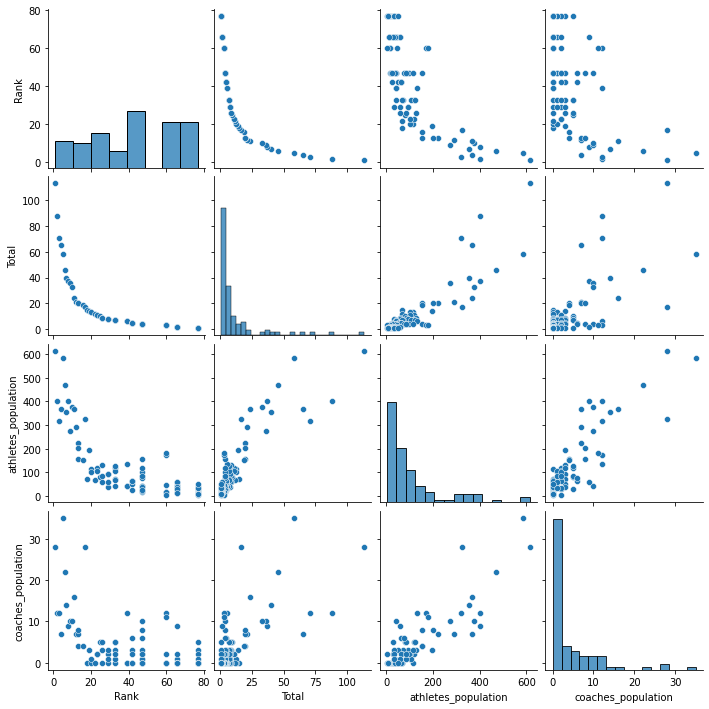

In [12]:
# 상관분석 시행 결과 시각화
sns.pairplot(total_df)

In [13]:
# 국가별 선수 및 코치 수에 따른 국가별 메달 보유 수 선형회귀 분석
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 국가 별 선수 수에 따른 국가별 메달 보유 수 선형회귀 분석
# 훈련 및 테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(
                                                    total_df['athletes_population'],
                                                    total_df['Total'],
                                                    test_size=0.3,
                                                    random_state=1
                                                  )
train_X = np.array(train_X).reshape(-1, 1)
train_y = np.array(train_y).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)
test_y = np.array(test_y).reshape(-1, 1)

# 모델 생성
athletes_model = LinearRegression()
athletes_model.fit(train_X, train_y)

# y = ax + b
# 가중치와 편향 도출
slope = athletes_model.coef_[0][0]
bias = athletes_model.intercept_[0]
print(f'slope: {slope}')
print(f'bias: {bias}')

# 예측
# r squared value 값 도출
athletes_model_pred_y = athletes_model.predict(test_X)
print(f'r2_score: {r2_score(test_y, athletes_model_pred_y)}')

# 평가
athletes_model.score(test_X, test_y)

slope: 0.1287433337875791
bias: -2.5082540047928408
r2_score: 0.5659629448809256


0.5659629448809256

Text(0.5, 1.0, 'predicted total medal count with athletes population')

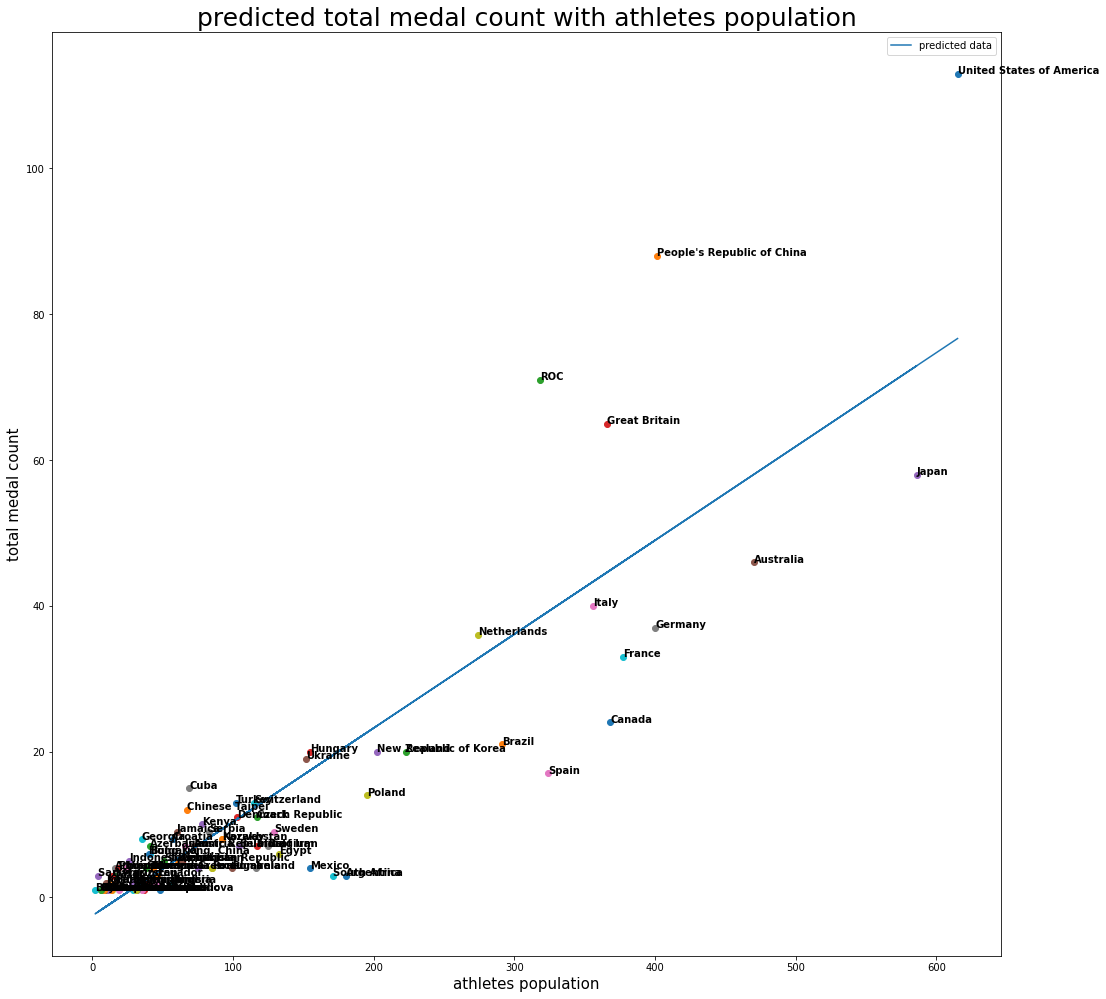

In [14]:
# 비교 시각화
plt.figure(figsize=(17, 17))

for data in total_df[['Total', 'athletes_population', 'Country']].values.tolist():
    total_medal_count = data[0]
    athletes_population = data[1]
    country = data[2]
    
    plt.scatter(athletes_population, total_medal_count)
    plt.text(athletes_population, total_medal_count, s=country, fontdict={'size' : 10, 'weight' : 'bold'})
    
plt.plot(total_df['athletes_population'], total_df['athletes_population'] * slope + bias,
        label='predicted data')

plt.legend()
plt.xlabel('athletes population', fontsize=15)
plt.ylabel('total medal count', fontsize=15)
plt.title('predicted total medal count with athletes population', fontsize=25)

In [15]:
# 국가 별 코치 수에 따른 국가별 메달 보유 수 선형회귀 분석
# 훈련 및 테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(
                                                    total_df['coaches_population'],
                                                    total_df['Total'],
                                                    test_size=0.3,
                                                    random_state=1
                                                  )
train_X = np.array(train_X).reshape(-1, 1)
train_y = np.array(train_y).reshape(-1, 1)
test_X = np.array(test_X).reshape(-1, 1)
test_y = np.array(test_y).reshape(-1, 1)

# 모델 생성
coaches_model = LinearRegression()
coaches_model.fit(train_X, train_y)

# y = ax + b
# 가중치와 편향 도출
slope2 = coaches_model.coef_[0][0]
bias2 = coaches_model.intercept_[0]
print(f'slope: {slope2}')
print(f'bias: {bias2}')

# 예측
# r squared value 값 도출
coaches_model_pred_y = coaches_model.predict(test_X)
print(f'r2_score: {r2_score(test_y, coaches_model_pred_y)}')

# 평가
coaches_model.score(test_X, test_y)

slope: 2.062184267500601
bias: 3.898567754112621
r2_score: 0.23814989221874938


0.23814989221874938

Text(0.5, 1.0, 'predicted total medal count with coaches population')

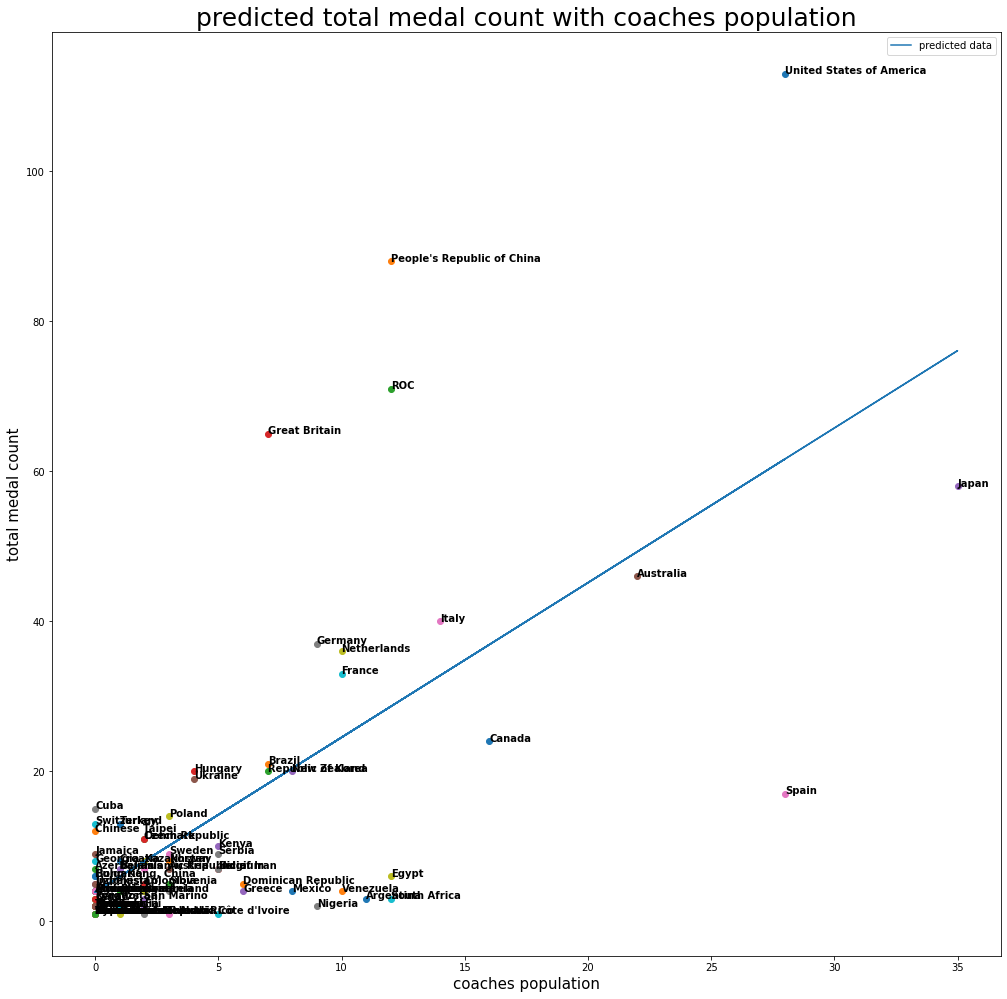

In [16]:
# 비교 시각화
plt.figure(figsize=(17, 17))

for data in total_df[['Total', 'coaches_population', 'Country']].values.tolist():
    total_medal_count = data[0]
    coaches_population = data[1]
    country = data[2]
    
    plt.scatter(coaches_population, total_medal_count)
    plt.text(coaches_population, total_medal_count, s=country, fontdict={'size' : 10, 'weight' : 'bold'})
    
plt.plot(total_df['coaches_population'], total_df['coaches_population'] * slope2 + bias2,
        label='predicted data')

plt.legend()
plt.xlabel('coaches population', fontsize=15)
plt.ylabel('total medal count', fontsize=15)
plt.title('predicted total medal count with coaches population', fontsize=25)

## 결론

1. 국가 별 운동 선수 수가 국가 별 메달 보유 수에 영향을 주는가?

상관관계: 0.875115	

회귀분석 r^2 점수: 0.5659629448809256


2. 국가 별 코치 수가 국가 별 메달 보유 수에 영향을 주는가?

상관관계: 0.691020

회귀분석 r^2 점수: 0.23814989221874938


3. 결론

상관관계 및 회귀분석 도출에 따른 점수를 종합하여 보았을 때, 국가 별 운동 선수 수가 국가 별 코치 수보다 국가 별 메달 보유 수에 영향을 더 주는 것을 알 수 있다.